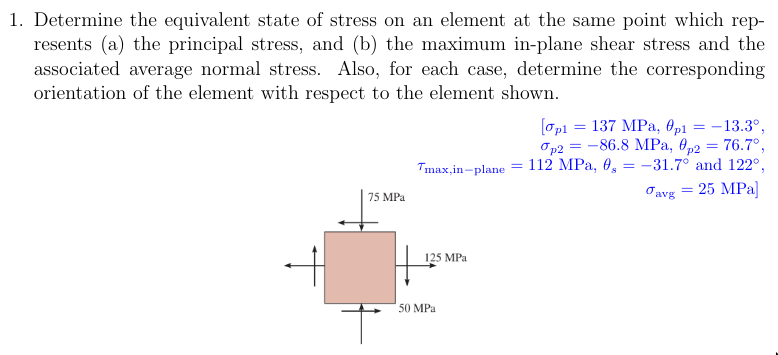

In [1]:
sigmaxx = 125
sigmayy = -75
tauxy = -50

We will first define the following:

$\sigma_{\rm avg} = \dfrac{1}{2}(\sigma_{xx} + \sigma_{yy})$

$R = \sqrt{\dfrac{(\sigma_{xx} - \sigma_{yy})^2}{4} + \tau_{xy}^2}$

Then, we have:

$\sigma_{\rm p1, p2} = \sigma_{\rm avg} \pm R$

In [2]:
from math import sqrt, atan, pi, cos, sin

In [3]:
sigma_avg = (sigmaxx+sigmayy)/2
R = sqrt((sigmaxx - sigmayy)**2/4 + tauxy**2)

sigmap1 = sigma_avg + R
sigmap2 = sigma_avg - R

display(sigmap1, sigmap2)

136.80339887498948

-86.80339887498948

We next determine the principal angle: $\tan 2\theta_{\rm p} = \dfrac{2 \tau_{xy}}{\sigma_{xx} - \sigma_{yy}}$

After taking the $\tan^{-1}$ we need to realize that actually there are going to be two values: $\theta_{\rm p}$ and $\theta_{\rm p} + 90^\circ$

In [4]:
thetap = 0.5*atan(2*tauxy/(sigmaxx - sigmayy))
display(thetap*180/pi) #converting from radians to degrees

-13.282525588538995

The above is just one of the values of the principal angles. The other value will be:

In [5]:
thetap*180/pi + 90

76.71747441146101

Although we now have in our hand two values of the principal stresses and two values of the principal angles, we do not know which principal angle corresponds to which principal stress. 

So we check by substituting the $\theta_{\rm p}$ in the formula:

$\sigma_{x'x'} = \dfrac{1}{2}(\sigma_{xx} + \sigma_{yy}) + \dfrac{1}{2}(\sigma_{xx} - \sigma_{yy})\cos 2\theta + \tau_{xy} \sin 2 \theta$

In [6]:
sigmax_dash = sigma_avg + (sigmaxx-sigmayy)/2*cos(2*thetap) + tauxy*sin(2*thetap)
display(sigmax_dash)

136.80339887498948

The above result shows that $\theta_{\rm p}$ corresponds to $\sigma_{\rm p1}$. Thus, the other angle $\theta_{\rm p} + 90^\circ$ corresponds to $\sigma_{\rm p2}$.

## Analysing using eigenvalues and eigenvectors

We next show that the principal stresses and principal angles can also be determined through the route of eigenvalues and eigenvectors. The important thing to note is that the principal stresses are the eigenvalues of the stress matrix whereas the eigenvectors give us the principal angles. 

For this, we will use the NumPy library of Python. NumPy has a built-in capability to determine eigenvalues and eigenvectors. 

In [7]:
import numpy as np

First, we set up the stress matrix. 

In [8]:
stress_matrix = np.matrix([[sigmaxx, tauxy],[tauxy, sigmayy]])
display(stress_matrix)

matrix([[125, -50],
        [-50, -75]])

Next, we find the eigenvalues and eigenvectors. 

In [9]:
evalues, evectors = np.linalg.eig(stress_matrix)

The eigenvalues are:

In [10]:
display(evalues)

array([136.80339887, -86.80339887])

Note that the two eigenvalues are exactly the same as the two principal stresses found earlier. 

The eigenvectors are:

In [11]:
display(evectors)

matrix([[ 0.97324899,  0.22975292],
        [-0.22975292,  0.97324899]])

Note that individual eigenvectors are the columns of the above $2\times2$ matrix. We extract them first. 

In [12]:
evec1 = evectors[:,0] #first eigenvector corresponding to the first eigenvalue
evec2 = evectors[:,1] #second eigenvector corresponding to the second eigenvalue
display(evec1, evec2)

matrix([[ 0.97324899],
        [-0.22975292]])

matrix([[0.22975292],
        [0.97324899]])

Note that each eigenvector appears in the form: $\begin{bmatrix}{v_x \\ v_y}\end{bmatrix}$. 

The orientation of this eigenvector gives the principal angle: $\tan \theta = \dfrac{v_y}{v_x}$. 

We thus obtain the two principal angles as follows:

In [13]:
atan(evec1[1]/evec1[0])*180/pi  #converting radians to degrees

/tmp/ipykernel_2667281/3673770952.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  atan(evec1[1]/evec1[0])*180/pi  #converting radians to degrees


-13.282525588538995

In [14]:
atan(evec2[1]/evec2[0])*180/pi  #converting radians to degrees

/tmp/ipykernel_2667281/730440239.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  atan(evec2[1]/evec2[0])*180/pi  #converting radians to degrees


76.71747441146101

Note that the above two angles are exactly the principal angles found earlier. 

One advantage of this method of finding the principal stresses and principal angles is that it directly gives the principal angle corresponding to a particular principal stress. In the earlier method, we had to check which principal angle corresponds to which principal stress. 

## Maximum in-plane shear stress

The maximum in-plane shear stress is the same as the radius of the Mohr's circle: $\tau_{\rm max, in} = R = \sqrt{\dfrac{(\sigma_{xx} - \sigma_{yy})^2}{4} + \tau_{xy}^2}$

tau_maxin = R
display(tau_maxin)

The angle is given by $\tan 2\theta_{\rm s} = - \dfrac{\sigma_{xx} - \sigma_{yy}}{2\tau_{xy}}$

In [15]:
theta_s = 0.5*atan(-(sigmaxx - sigmayy)/(2*tauxy))
display(theta_s*180/pi)

31.717474411461005

Note that the negative sign in the given answer is wrong. 

Note also that above angle could also have been obtained using $\theta_{\rm p} + 45^\circ$. 

However, there will be another angle given by $\theta_{\rm s} + 90^\circ$.

In [16]:
display(theta_s*180/pi + 90)

121.71747441146101

The associate normal stress is nothing but the $\sigma_{\rm avg}$. (Refer to the Mohr's circle)

In [17]:
sigma_avg

25.0

This can also be verified by substituting the angle $\theta_{\rm s}$ in the stress transformation formula. 

In [18]:
sigma_avg + 0.5*(sigmaxx - sigmayy)*cos(2*theta_s) + tauxy*sin(2*theta_s)

25.000000000000014